In [1]:
# import packages

import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
import os

## 0. Mount with your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = '/content/drive/MyDrive/ai/Machine&Deep Learning Project/Machine_and_Deep_learning/Deep Learning Projects/Deep CNN Image Classifier with (Happy & Sad) images/data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
os.listdir(data_dir)

['Happy', 'Sad']

In [7]:
for image_class_folder in os.listdir(data_dir):
  for idx, image in enumerate(os.listdir(os.path.join(data_dir,image_class_folder))):
    image_path = os.path.join(data_dir,image_class_folder,image)
    try:
      img = cv2.imread(filename=image_path)
      chk_ext = imghdr.what(image_path)
      if not (chk_ext in image_exts):
        print(f'Image not in ext list {image_path}')
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))



## 3. Load Data

In [8]:
## this command show docs

# tf.keras.utils.image_dataset_from_directory??

https://www.tensorflow.org/api_docs/python/tf/data/Dataset

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) ## 256, 256, 3

Found 427 files belonging to 2 classes.


In [10]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
batch = data_iterator.next()

In [14]:
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1].shape # per batch image class label

(32,)

In [16]:
# Sad person = 1
# Happy person = 0

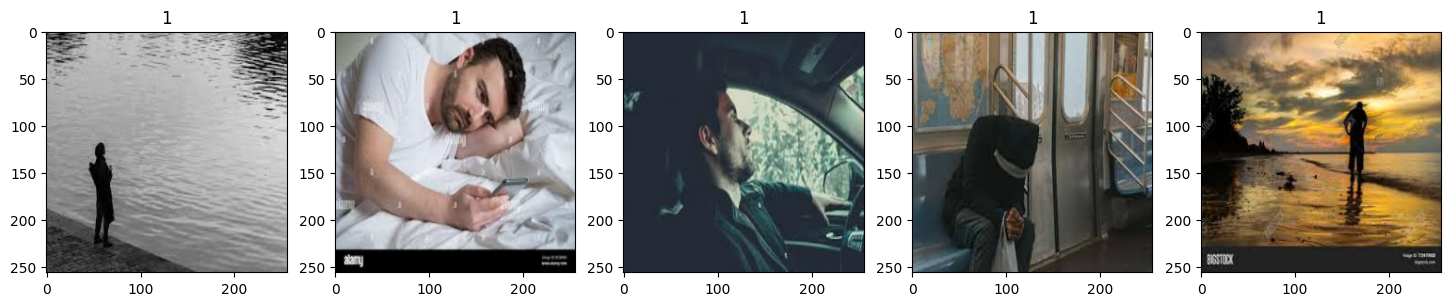

In [17]:
fig, ax = plt.subplots(ncols=5, figsize=(18,18))
for idx, img in enumerate(batch[0][0:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


## 4. Scale Data

In [18]:
scaled_data = data.map(lambda x,y:(x/255,y))

In [19]:
# scaled_data.as_numpy_iterator??

In [20]:
scaled_data.as_numpy_iterator().next()[0][0].min()

0.0

In [21]:
scaled_data.as_numpy_iterator().next()[0][0].max()

1.0


## 5. Split Data

In [22]:
len(data)

14

In [23]:
train_size = int(len(data)* .6)
val_size = int(len(data)* .2) +1
test_size = int(len(data)* .2) +1


print(train_size+val_size+test_size)
train_size,val_size,test_size

14


(8, 3, 3)

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 6. Build Deep Learning Model

In [59]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
# tf.keras.layers.Conv2D??

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),

    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),

    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

In [62]:
# tf.metrics??

In [63]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),metrics=tf.metrics.Accuracy())

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)      

## 7. Train

In [65]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
EarlyStopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [66]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 13s 951ms/step - loss: 689.8796 - accuracy: 0.5469 - val_loss: 126.6499 - val_accuracy: 0.7500
Epoch 2/20
8/8 [==============================] - 12s 1s/step - loss: 38.0183 - accuracy: 0.3125 - val_loss: 0.8526 - val_accuracy: 0.0625
Epoch 3/20
8/8 [==============================] - 11s 1s/step - loss: 0.8368 - accuracy: 0.0508 - val_loss: 0.4774 - val_accuracy: 0.0417
Epoch 4/20
8/8 [==============================] - 15s 2s/step - loss: 0.4954 - accuracy: 0.0117 - val_loss: 0.4244 - val_accuracy: 0.0208
Epoch 5/20
8/8 [==============================] - 14s 1s/step - loss: 0.4469 - accuracy: 0.0312 - val_loss: 0.3850 - val_accuracy: 0.0417
Epoch 6/20
8/8 [==============================] - 11s 1s/step - loss: 0.4263 - accuracy: 0.0352 - val_loss: 0.3601 - val_accuracy: 0.0208
Epoch 7/20
8/8 [==============================] - 11s 1s/step - loss: 0.3428 - accuracy: 0.0664 - val_loss: 0.3326 - val_accuracy: 0.0521
Epoch 8/20
8/8 [==========

In [67]:
# hist.history??


## 8. Plot Performance

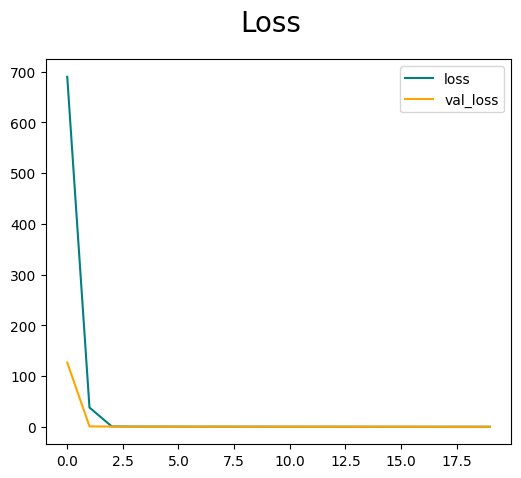

In [68]:
fig = plt.figure(figsize=(6,5))
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

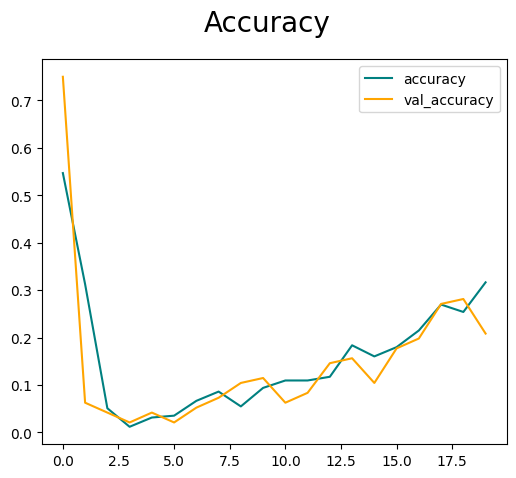

In [69]:
fig = plt.figure(figsize=(6,5))
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper right")
plt.show()


## 9. Evaluate

In [70]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [71]:
precision = Precision()
recall = Recall()
binaryAccuracy = BinaryAccuracy()

In [72]:
for batch in test.as_numpy_iterator():
  X,y = batch
  y_predict = model.predict(X)
  precision.update_state(y, y_predict)
  recall.update_state(y, y_predict)
  binaryAccuracy.update_state(y, y_predict)

1/1 [==============================] - 0s 79ms/step


In [74]:
print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, BinaryAccuracy:{binaryAccuracy.result().numpy()}')

Precision:0.9629629850387573, Recall:1.0, BinaryAccuracy:0.9733333587646484


## 10. Test

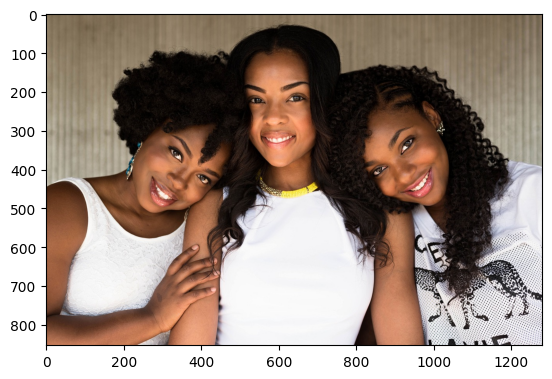

In [97]:
img = cv2.imread('/content/drive/MyDrive/ai/Machine&Deep Learning Project/Machine_and_Deep_learning/Deep Learning Projects/Deep CNN Image Classifier with (Happy & Sad) images/happy1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

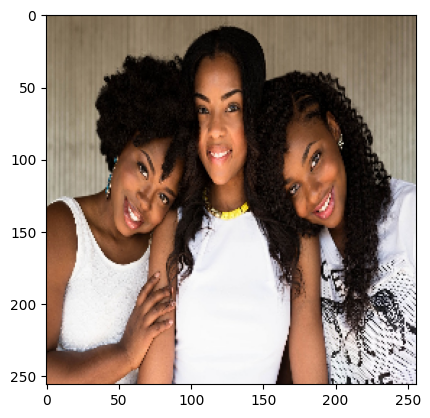

In [98]:
resize_image = tf.image.resize(img, (256,256))
plt.imshow(resize_image.numpy().astype(int))
plt.show()

In [99]:
resize_image.shape
# but our model take the shape (batch,256,256,3), so first dimension is matching, how we achieve that dimension by using
# np.expand_dims()

TensorShape([256, 256, 3])

In [100]:
np.expand_dims((resize_image/255),0).shape

(1, 256, 256, 3)

In [101]:
y_pred = model.predict(np.expand_dims((resize_image/255),0))

1/1 [==============================] - 0s 20ms/step


In [102]:
y_pred

array([[0.5692112]], dtype=float32)

In [103]:
if y_pred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad



## 11. Save the Model

In [104]:
from tensorflow.keras.models import load_model

In [106]:
model.save(os.path.join('/content/drive/MyDrive/ai/Machine&Deep Learning Project/Machine_and_Deep_learning/Deep Learning Projects/Deep CNN Image Classifier with (Happy & Sad) images/model','Happy_Sad_imag_classifier.h5'))

In [108]:
new_model = load_model(os.path.join('/content/drive/MyDrive/ai/Machine&Deep Learning Project/Machine_and_Deep_learning/Deep Learning Projects/Deep CNN Image Classifier with (Happy & Sad) images/model','Happy_Sad_imag_classifier.h5'))

In [109]:
new_model

In [111]:
y_pred = new_model.predict(np.expand_dims((resize_image/255),0))
y_pred

1/1 [==============================] - 0s 18ms/step


array([[0.5692112]], dtype=float32)

In [112]:
if y_pred > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
